## CS 200: Analysis of Algorithms


<p>
<script language="JavaScript">
document.write("Last modified: " + document.lastModified)
</script>
    
Video: <a target=qq href="https://www.youtube.com/watch?v=p65AHm9MX80">Analyzing Algorithms</a>
    
<a target=ww href="https://www.bigocheatsheet.com/">Big-O Cheat Sheet</a>
    
    
### Timing functions
    
We can use the Jupyter magic command %timeit
    

In [1]:
def sum1(n):
    sum = 0
    for x in range(n+1):
        sum += x
    return sum

In [2]:
sum1(100000)

5000050000

In [3]:
%timeit sum1(100000)

4.01 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
from functools import reduce

In [5]:
def sum2(n):
    return reduce(lambda x,y: x+y, range(n+1))

In [6]:
sum2(100000)

5000050000

In [7]:
%timeit sum2(100000)

7.08 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Timing functions

We create our own function to time execution time.

In [15]:
import time

In [16]:
time.perf_counter()

371360.807213458

In [17]:
def functime(func, arg):
    ''' stopwatch function to time execution time '''
    tic = time.perf_counter()
    val = func(arg)
    toc = time.perf_counter()
    elapsed = toc - tic
    return (val, arg, elapsed)        

In [18]:
functime(sum1,100000)

(5000050000, 100000, 0.0041978079825639725)

In [19]:
functime(sum1,1000000)

(500000500000, 1000000, 0.04292349598836154)

In [20]:
functime(sum2,100000)

(5000050000, 100000, 0.007542783976532519)

In [21]:
functime(sum2,1000000)

(500000500000, 1000000, 0.07486499997321516)

In [22]:
def sum3(n):
    ''' Guaus's formula for sum of first n integers '''
    return int((n*(n+1))/2)

In [23]:
sum3(10000)

50005000

In [24]:
functime(sum3,100000)

(5000050000, 100000, 2.4819746613502502e-06)

In [25]:
functime(sum3, 1000000)

(500000500000, 1000000, 2.082961145788431e-06)

In [26]:
functime(sum3,10000000)

(50000005000000, 10000000, 2.208980731666088e-06)

In [27]:
functime(sum3, 100)

(5050, 100, 2.128013875335455e-06)

In [28]:
def mapfunctime(func, arglist = [1000,10000,100000,1000000]):
    return list(map(lambda x: functime(func, x), arglist))

In [29]:
mapfunctime(sum1)

[(500500, 1000, 4.1875988245010376e-05),
 (50005000, 10000, 0.00040575896855443716),
 (5000050000, 100000, 0.00431140698492527),
 (500000500000, 1000000, 0.042788993974681944)]

In [30]:
mapfunctime(sum2)

[(500500, 1000, 7.408205419778824e-05),
 (50005000, 10000, 0.0007085069664753973),
 (5000050000, 100000, 0.007762196997646242),
 (500000500000, 1000000, 0.0752282990142703)]

In [31]:
x = mapfunctime(sum3)

In [32]:
[b for a,b,c in x]

[1000, 10000, 100000, 1000000]

### Plotting the execution times

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def plottimes(func):
    ''' plot the execution time on XY graph '''
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.set_xlabel('elements')  # Add an x-label to the axes.
    ax.set_ylabel('execution time')  # Add a y-label to the axes.
    ax.set_title("Complexity: " + func.__name__)  # Add a title to the axes.
    data = mapfunctime(func)
    x = [arg for val, arg, time in data]
    y = [time for val, arg, time in data]
    ax.plot(x, y)


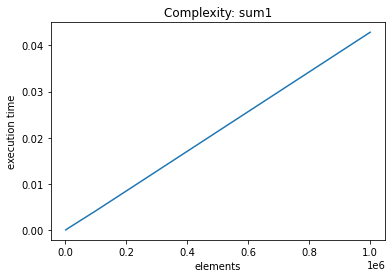

In [35]:
plottimes(sum1)

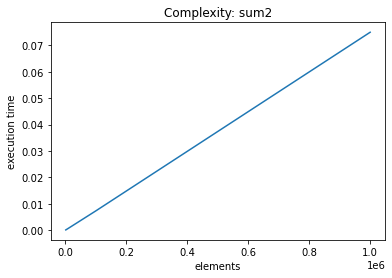

In [36]:
plottimes(sum2)

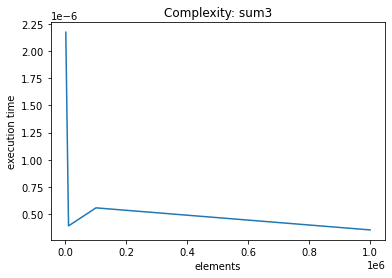

In [37]:
plottimes(sum3)

In [38]:
def plottimes2(funclist, lst = [1000, 10000, 100000, 1000000]):
    ''' plot the execution time on XY graph '''
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.set_xlabel('elements')  # Add an x-label to the axes.
    ax.set_ylabel('execution time')  # Add a y-label to the axes.
    ax.set_title("Complexity")  # Add a title to the axes.
    for func in funclist:
      data = mapfunctime(func, lst)
      x = [arg for val, arg, time in data]
      y = [time for val, arg, time in data]
      ax.plot(x, y, label=func.__name__)
    ax.legend()

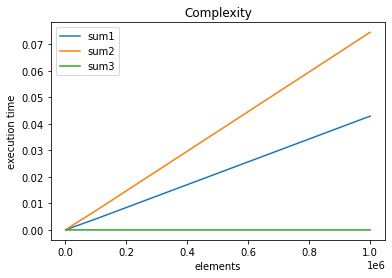

In [39]:
plottimes2([sum1, sum2, sum3])

### Big-O Notation

We want to be able to analyze the efficiency or complexity of algorithms. The functions sum1, sum2, and sum3 all do the same thing: add up the first n integers.  We note that sum1 and sum2 each get slower as the input N gets bigger.  By contrast, sum3 is just as fast no matter the size of N.  sum1 and sum2 are linear with respectt to N, while sum3 is constant.  The fact that sum2 is slightly slower than sum1 does not matter.  They are both linear.  Their execution times are a linear function of the size of N.

We say that sum1 and sum2 are <b>O(N)</b>.  That is, their complexity is order N.

By contrast, sum3 is <B>O(1)</b>, which is to say that it is of order constant time.

Let's define some other functions.

In [40]:
def loop1(N):
    count = 0
    for i in range(N):
        for j in range(N):
            count += 1
    return count

In [41]:
def loop2(N):
    count = 0
    for i in range(N):
        for j in range(i):
            count += 1
    return count

In [42]:
def loop3(N):
    count = 0
    for i in range(N):
        for j in range(N):
            for k in range(N):
                count += 1
    return count

In [43]:
%timeit loop1(100)

332 µs ± 417 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%timeit loop2(100)

171 µs ± 232 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [45]:
%timeit loop3(100)

33.8 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


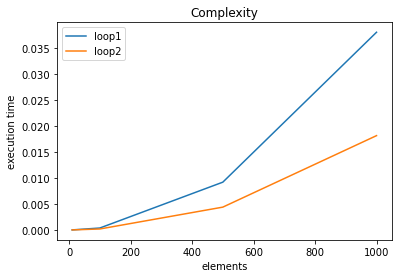

In [49]:
plottimes2([loop1, loop2], [10, 100, 500, 1000])

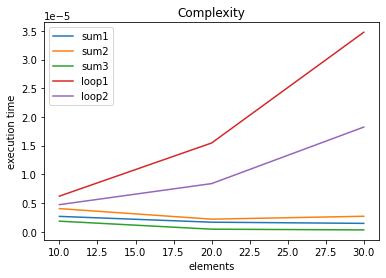

In [55]:
plottimes2([sum1, sum2, sum3, loop1, loop2], [10, 20, 30])

In [56]:
def plottimeslogy(funclist, lst = [1000, 10000, 100000, 1000000]):
    ''' plot the execution time on XY graph '''
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.set_xlabel('elements')  # Add an x-label to the axes.
    ax.set_ylabel('execution time')  # Add a y-label to the axes.
    ax.set_title("Complexity")  # Add a title to the axes.
    ax.set_yscale('log')
    for func in funclist:
      data = mapfunctime(func, lst)
      x = [arg for val, arg, time in data]
      y = [time for val, arg, time in data]
      ax.plot(x, y, label=func.__name__)
    ax.legend()

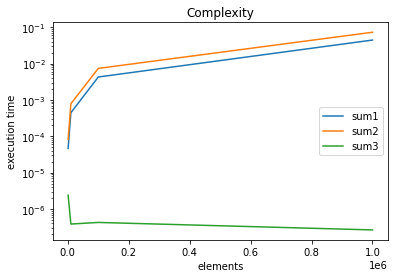

In [57]:
plottimeslogy([sum1, sum2, sum3])

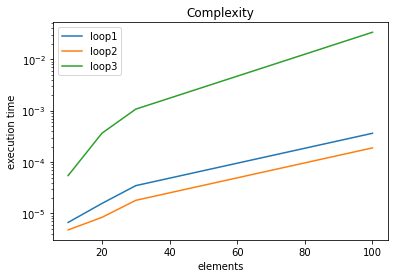

In [58]:
plottimeslogy([loop1, loop2, loop3],[10,20,30,100])

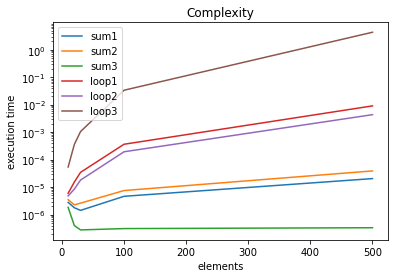

In [60]:
plottimeslogy([sum1, sum2, sum3,loop1, loop2, loop3],[10,20,30,100,500])